In [2]:
import os
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [3]:
df_train=pd.read_csv("AdvWorksCusts.csv")
ave_spend=pd.read_csv("AW_AveMonthSpend.csv")
bike_buyer=pd.read_csv('AW_BikeBuyer.csv')
df_test=pd.read_csv('AW_test.csv')

In [4]:
df_train.head(5).T

0                    1  \
CustomerID                          11000                11001   
Title                                 NaN                  NaN   
FirstName                             Jon               Eugene   
MiddleName                              V                    L   
LastName                             Yang                Huang   
Suffix                                NaN                  NaN   
AddressLine1              3761 N. 14th St           2243 W St.   
AddressLine2                          NaN                  NaN   
City                          Rockhampton              Seaford   
StateProvinceName              Queensland             Victoria   
CountryRegionName               Australia            Australia   
PostalCode                           4700                 3198   
PhoneNumber           1 (11) 500 555-0162  1 (11) 500 555-0110   
BirthDate                      1966-04-08           1965-05-14   
Education                      Bachelors            Bachelors    
Occupation                   Professional         Professional   
Gender                                  M                    M   
MaritalStatus                           M                    S   
HomeOwnerFlag                           1                    0   
NumberCarsOwned                         0                    1   
NumberChildrenAtHome                    0                    3   
TotalChildren                           2                    3   
YearlyIncome                       137947               101141   

                                        2                    3  \
CustomerID                          11002                11003   
Title                                 NaN                  NaN   
FirstName                           Ruben              Christy   
MiddleName                            NaN                  NaN   
LastName                           Torres                  Zhu   
Suffix                                NaN                  NaN   
AddressLine1             5844 Linden Land     1825 Village Pl.   
AddressLine2                          NaN                  NaN   
City                               Hobart           North Ryde   
StateProvinceName                Tasmania      New South Wales   
CountryRegionName               Australia            Australia   
PostalCode                           7001                 2113   
PhoneNumber           1 (11) 500 555-0184  1 (11) 500 555-0162   
BirthDate                      1965-08-12           1968-02-15   
Education                      Bachelors            Bachelors    
Occupation                   Professional         Professional   
Gender                                  M                    F   
MaritalStatus                           M                    S   
HomeOwnerFlag                           1                    0   
NumberCarsOwned                         1                    1   
NumberChildrenAtHome                    3                    0   
TotalChildren                           3                    0   
YearlyIncome                        91945                86688   

                                        4  
CustomerID                          11004  
Title                                 NaN  
FirstName                       Elizabeth  
MiddleName                            NaN  
LastName                          Johnson  
Suffix                                NaN  
AddressLine1          7553 Harness Circle  
AddressLine2                          NaN  
City                           Wollongong  
StateProvinceName         New South Wales  
CountryRegionName               Australia  
PostalCode                           2500  
PhoneNumber           1 (11) 500 555-0131  
BirthDate                      1968-08-08  
Education                      Bachelors   
Occupation                   Professional  
Gender                                  F  
MaritalStatus                           S  
HomeOwnerFlag                     

In [5]:
ave_spend.head(5).T

0      1      2      3      4
CustomerID     11000  11001  11002  11003  11004
AveMonthSpend     89    117    123     50     95

In [6]:
ave_spend.shape

(16519, 2)

In [7]:
bike_buyer.head(5).T

0      1      2      3      4
CustomerID  11000  11001  11002  11003  11004
BikeBuyer       0      1      0      0      1

In [8]:
bike_buyer.shape

(16519, 2)

In [9]:
df_test.head(5).T

0                 1  \
CustomerID                            18988             29135   
Title                                   NaN               NaN   
FirstName                          Courtney              Adam   
MiddleName                                A                 C   
LastName                              Baker             Allen   
Suffix                                  NaN               NaN   
AddressLine1          8727 Buena Vista Ave.  3491 Cook Street   
AddressLine2                            NaN               NaN   
City                                Fremont             Haney   
StateProvinceName                California  British Columbia   
CountryRegionName             United States            Canada   
PostalCode                            94536           V2W 1W2   
PhoneNumber                    133-555-0128      252-555-0173   
BirthDate                          1/5/1945         10/4/1964   
Education                        Bachelors         Bachelors    
Occupation                       Management    Skilled Manual   
Gender                                    F                 M   
MaritalStatus                             S                 M   
HomeOwnerFlag                             0                 1   
NumberCarsOwned                           2                 2   
NumberChildrenAtHome                      0                 2   
TotalChildren                             5                 4   
YearlyIncome                          86931            100125   

                                         2                 3  \
CustomerID                           12156             13749   
Title                                  NaN               NaN   
FirstName                           Bonnie             Julio   
MiddleName                             NaN                 C   
LastName                              Raji            Alonso   
Suffix                                 NaN               NaN   
AddressLine1          359 Pleasant Hill Rd  8945 Euclid Ave.   
AddressLine2                           NaN               NaN   
City                               Burbank        Burlingame   
StateProvinceName               California        California   
CountryRegionName            United States     United States   
PostalCode                           91502             94010   
PhoneNumber                   409-555-0193      175-555-0196   
BirthDate                        1/12/1934         9/22/1958   
Education                  Graduate Degree   Graduate Degree   
Occupation                      Management    Skilled Manual   
Gender                                   F                 M   
MaritalStatus                            M                 M   
HomeOwnerFlag                            1                 1   
NumberCarsOwned                          2                 0   
NumberChildrenAtHome                     0                 0   
TotalChildren                            4                 4   
YearlyIncome                        103985            127161   

                                           4  
CustomerID                             27780  
Title                                    NaN  
FirstName                            Christy  
MiddleName                                 A  
LastName                            Andersen  
Suffix                                   NaN  
AddressLine1          42, boulevard Tremblay  
AddressLine2                             NaN  
City                               Dunkerque  
StateProvinceName                       Nord  
CountryRegionName                     France  
PostalCode                             59140  
PhoneNumber              1 (11) 500 555-0122  
BirthDate                          3/19/1965  
Education                        High School  
Occupation                            Manual  
Gender                                     F  
MaritalStatus                              M  
HomeOwnerFlag                              1  
Numb

In [10]:
print('Shape before merging Data:', df_train.shape)
df_train=pd.merge(df_train,ave_spend,how='inner', on='CustomerID')
print('Shape After merging Data:', df_train.shape)

Shape before merging Data: (16519, 23)
Shape After merging Data: (16749, 24)


In [11]:
print('Shape before dropping duplicates', df_train.shape)
df_train.drop_duplicates(subset='CustomerID', keep='last')
print('Shape after dropping duplicates', df_train.shape)

Shape before dropping duplicates (16749, 24)
Shape after dropping duplicates (16749, 24)


In [12]:
df_train.head(5).T

0                    1  \
CustomerID                          11000                11001   
Title                                 NaN                  NaN   
FirstName                             Jon               Eugene   
MiddleName                              V                    L   
LastName                             Yang                Huang   
Suffix                                NaN                  NaN   
AddressLine1              3761 N. 14th St           2243 W St.   
AddressLine2                          NaN                  NaN   
City                          Rockhampton              Seaford   
StateProvinceName              Queensland             Victoria   
CountryRegionName               Australia            Australia   
PostalCode                           4700                 3198   
PhoneNumber           1 (11) 500 555-0162  1 (11) 500 555-0110   
BirthDate                      1966-04-08           1965-05-14   
Education                      Bachelors            Bachelors    
Occupation                   Professional         Professional   
Gender                                  M                    M   
MaritalStatus                           M                    S   
HomeOwnerFlag                           1                    0   
NumberCarsOwned                         0                    1   
NumberChildrenAtHome                    0                    3   
TotalChildren                           2                    3   
YearlyIncome                       137947               101141   
AveMonthSpend                          89                  117   

                                        2                    3  \
CustomerID                          11002                11003   
Title                                 NaN                  NaN   
FirstName                           Ruben              Christy   
MiddleName                            NaN                  NaN   
LastName                           Torres                  Zhu   
Suffix                                NaN                  NaN   
AddressLine1             5844 Linden Land     1825 Village Pl.   
AddressLine2                          NaN                  NaN   
City                               Hobart           North Ryde   
StateProvinceName                Tasmania      New South Wales   
CountryRegionName               Australia            Australia   
PostalCode                           7001                 2113   
PhoneNumber           1 (11) 500 555-0184  1 (11) 500 555-0162   
BirthDate                      1965-08-12           1968-02-15   
Education                      Bachelors            Bachelors    
Occupation                   Professional         Professional   
Gender                                  M                    F   
MaritalStatus                           M                    S   
HomeOwnerFlag                           1                    0   
NumberCarsOwned                         1                    1   
NumberChildrenAtHome                    3                    0   
TotalChildren                           3                    0   
YearlyIncome                        91945                86688   
AveMonthSpend                         123                   50   

                                        4  
CustomerID                          11004  
Title                                 NaN  
FirstName                       Elizabeth  
MiddleName                            NaN  
LastName                          Johnson  
Suffix                                NaN  
AddressLine1          7553 Harness Circle  
AddressLine2                          NaN  
City                           Wollongong  
StateProvinceName         New South Wales  
CountryRegionName               Australia  
PostalCode                           2500  
PhoneNumber           1 (11) 500 555-0131  
BirthDate                      1968-08-08  
Education                      Bachelors   
Occupation                   Profe

In [13]:
df_train.describe()

CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count  16749.000000   16749.000000     16749.000000          16749.000000   
mean   20222.633112       0.673473         1.503433              0.993791   
std     5346.696692       0.468957         1.138620              1.516555   
min    11000.000000       0.000000         0.000000              0.000000   
25%    15580.000000       0.000000         1.000000              0.000000   
50%    20200.000000       1.000000         2.000000              0.000000   
75%    24857.000000       1.000000         2.000000              2.000000   
max    29482.000000       1.000000         4.000000              5.000000   

       TotalChildren   YearlyIncome  AveMonthSpend  
count   16749.000000   16749.000000   16749.000000  
mean        2.009613   78109.602185      72.436325  
std         1.683549   39678.696234      27.315927  
min         0.000000    9482.000000      22.000000  
25%         0.000000   47787.000000      52.000000  
50%         2.000000   76120.000000      68.000000  
75%         3.000000  105179.000000      84.000000  
max         5.000000  196511.000000     176.000000

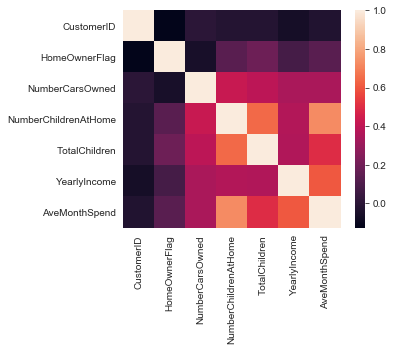

In [14]:
#Heat map
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


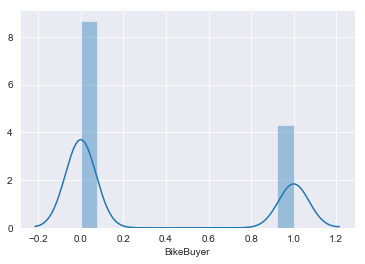

In [15]:
sns.distplot(bike_buyer['BikeBuyer'])

In [16]:
df_train.describe(include=[np.object, pd.Categorical]).T

count unique                  top  freq
Title                 88      5                  Mr.    43
FirstName          16749    662             Isabella    91
MiddleName          9696     44                    L  1178
LastName           16749    363                 Diaz   193
Suffix                 2      1                  Jr.     2
AddressLine1       16749  11879    Attaché de Presse    18
AddressLine2         281    154    Verkaufsabteilung    28
City               16749    270               London   379
StateProvinceName  16749     52           California  4023
CountryRegionName  16749      6        United States  7088
PostalCode         16749    324                98168   191
PhoneNumber        16749   7949  1 (11) 500 555-0118   187
BirthDate          16749   7896           1973-10-18    11
Education          16749      5           Bachelors   4860
Occupation         16749      5         Professional  5045
Gender             16749      2                    M  8473
MaritalStatus      16749      2                    M  9047

In [17]:
df_train['Occupation'].value_counts()

Professional      5045
Skilled Manual    4119
Management        2766
Clerical          2663
Manual            2156
Name: Occupation, dtype: int64

In [18]:
sns.boxplot(data=df_train, x='Occupation', y='AveMonthSpend')

In [19]:
df_train["BirthDate"]=pd.to_datetime(df_train['BirthDate'], infer_datetime_format=True)
df_train['year']=df_train['BirthDate'].dt.year

In [20]:
df_train['Age']=1998-df_train['year']
df_train.head(5).T

0                    1  \
CustomerID                          11000                11001   
Title                                 NaN                  NaN   
FirstName                             Jon               Eugene   
MiddleName                              V                    L   
LastName                             Yang                Huang   
Suffix                                NaN                  NaN   
AddressLine1              3761 N. 14th St           2243 W St.   
AddressLine2                          NaN                  NaN   
City                          Rockhampton              Seaford   
StateProvinceName              Queensland             Victoria   
CountryRegionName               Australia            Australia   
PostalCode                           4700                 3198   
PhoneNumber           1 (11) 500 555-0162  1 (11) 500 555-0110   
BirthDate             1966-04-08 00:00:00  1965-05-14 00:00:00   
Education                      Bachelors            Bachelors    
Occupation                   Professional         Professional   
Gender                                  M                    M   
MaritalStatus                           M                    S   
HomeOwnerFlag                           1                    0   
NumberCarsOwned                         0                    1   
NumberChildrenAtHome                    0                    3   
TotalChildren                           2                    3   
YearlyIncome                       137947               101141   
AveMonthSpend                          89                  117   
year                                 1966                 1965   
Age                                    32                   33   

                                        2                    3  \
CustomerID                          11002                11003   
Title                                 NaN                  NaN   
FirstName                           Ruben              Christy   
MiddleName                            NaN                  NaN   
LastName                           Torres                  Zhu   
Suffix                                NaN                  NaN   
AddressLine1             5844 Linden Land     1825 Village Pl.   
AddressLine2                          NaN                  NaN   
City                               Hobart           North Ryde   
StateProvinceName                Tasmania      New South Wales   
CountryRegionName               Australia            Australia   
PostalCode                           7001                 2113   
PhoneNumber           1 (11) 500 555-0184  1 (11) 500 555-0162   
BirthDate             1965-08-12 00:00:00  1968-02-15 00:00:00   
Education                      Bachelors            Bachelors    
Occupation                   Professional         Professional   
Gender                                  M                    F   
MaritalStatus                           M                    S   
HomeOwnerFlag                           1                    0   
NumberCarsOwned                         1                    1   
NumberChildrenAtHome                    3                    0   
TotalChildren                           3                    0   
YearlyIncome                        91945                86688   
AveMonthSpend                         123                   50   
year                                 1965                 1968   
Age                                    33                   30   

                                        4  
CustomerID                          11004  
Title                                 NaN  
FirstName                       Elizabeth  
MiddleName                            NaN  
LastName                          Johnson  
Suffix                                NaN  
AddressLine1          7553 Harness Circle  
AddressLine2                          NaN  
City                           Wollongong  
StateProvinceName         New Sout

In [21]:
df_test["BirthDate"]=pd.to_datetime(df_test['BirthDate'], infer_datetime_format=True)
df_test['year']=df_test['BirthDate'].dt.year
df_test['Age']=1998-df_test['year']
df_test.head(5).T

0                    1  \
CustomerID                            18988                29135   
Title                                   NaN                  NaN   
FirstName                          Courtney                 Adam   
MiddleName                                A                    C   
LastName                              Baker                Allen   
Suffix                                  NaN                  NaN   
AddressLine1          8727 Buena Vista Ave.     3491 Cook Street   
AddressLine2                            NaN                  NaN   
City                                Fremont                Haney   
StateProvinceName                California     British Columbia   
CountryRegionName             United States               Canada   
PostalCode                            94536              V2W 1W2   
PhoneNumber                    133-555-0128         252-555-0173   
BirthDate               1945-01-05 00:00:00  1964-10-04 00:00:00   
Education                        Bachelors            Bachelors    
Occupation                       Management       Skilled Manual   
Gender                                    F                    M   
MaritalStatus                             S                    M   
HomeOwnerFlag                             0                    1   
NumberCarsOwned                           2                    2   
NumberChildrenAtHome                      0                    2   
TotalChildren                             5                    4   
YearlyIncome                          86931               100125   
year                                   1945                 1964   
Age                                      53                   34   

                                         2                    3  \
CustomerID                           12156                13749   
Title                                  NaN                  NaN   
FirstName                           Bonnie                Julio   
MiddleName                             NaN                    C   
LastName                              Raji               Alonso   
Suffix                                 NaN                  NaN   
AddressLine1          359 Pleasant Hill Rd     8945 Euclid Ave.   
AddressLine2                           NaN                  NaN   
City                               Burbank           Burlingame   
StateProvinceName               California           California   
CountryRegionName            United States        United States   
PostalCode                           91502                94010   
PhoneNumber                   409-555-0193         175-555-0196   
BirthDate              1934-01-12 00:00:00  1958-09-22 00:00:00   
Education                  Graduate Degree      Graduate Degree   
Occupation                      Management       Skilled Manual   
Gender                                   F                    M   
MaritalStatus                            M                    M   
HomeOwnerFlag                            1                    1   
NumberCarsOwned                          2                    0   
NumberChildrenAtHome                     0                    0   
TotalChildren                            4                    4   
YearlyIncome                        103985               127161   
year                                  1934                 1958   
Age                                     64                   40   

                                           4  
CustomerID                             27780  
Title                                    NaN  
FirstName                            Christy  
MiddleName                                 A  
LastName                            Andersen  
Suffix                                   NaN  
AddressLine1          42, boulevard Tremblay  
AddressLine2                             NaN  
City                               Dunkerque  
StateProvinceName                       Nord  
CountryRegion

In [22]:
sns.scatterplot(data=df_train, x='Age', y='AveMonthSpend', hue='Gender')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


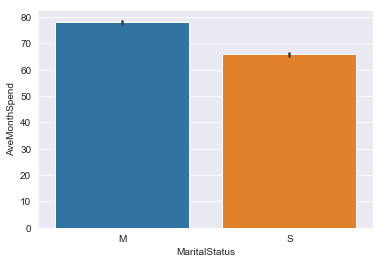

In [23]:
sns.barplot(data=df_train, x='MaritalStatus', y='AveMonthSpend')

In [24]:
sns.boxplot(data=df_train, x='MaritalStatus', y='AveMonthSpend')

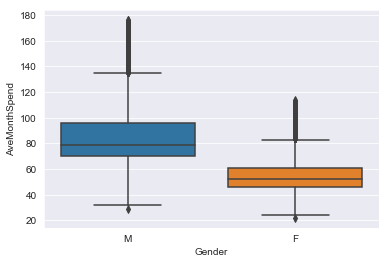

In [25]:
sns.boxplot(data=df_train, x='Gender', y='AveMonthSpend')

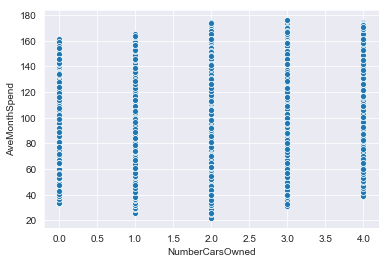

In [26]:
sns.scatterplot(data=df_train, x='NumberCarsOwned', y='AveMonthSpend')

In [27]:
cars={0:'No cars', 1:'>1 cars', 2:'>1 cars', 3:'>3 cars', 4:'>3 cars'}
dataset=[df_train, df_test]
for data in dataset:
    data['NumberCarsOwned']=data['NumberCarsOwned'].replace(cars)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


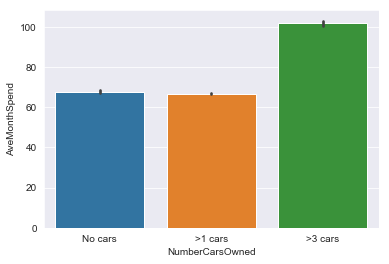

In [28]:
sns.barplot(data=df_train, x='NumberCarsOwned', y='AveMonthSpend')

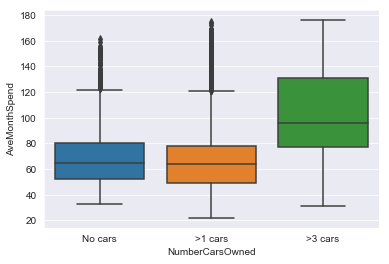

In [29]:
sns.boxplot(data=df_train, x='NumberCarsOwned', y='AveMonthSpend')

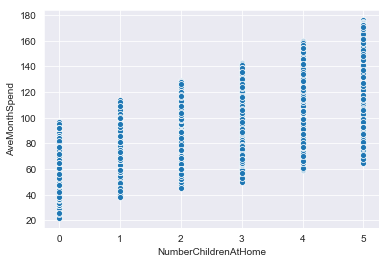

In [30]:
sns.scatterplot(data=df_train, x='NumberChildrenAtHome', y='AveMonthSpend')

In [31]:
children={0:'No Children', 1:'More than 1', 2:'More than 1', 3:'More than 1', 4:'More than 1', 5:'More than 1'}
dataset=[df_train, df_test]
for data in dataset:
    data['NumberChildrenAtHome']=data['NumberChildrenAtHome'].replace(children)

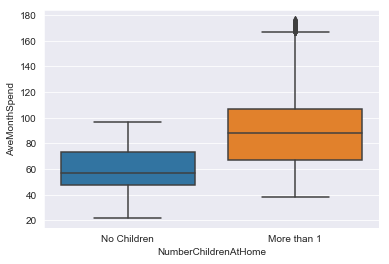

In [32]:
sns.boxplot(data=df_train, x='NumberChildrenAtHome', y='AveMonthSpend')

In [33]:
df_train.head(5)

CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName ... Gender  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland ...      M   
1           2243 W St.          NaN      Seaford          Victoria ...      M   
2     5844 Linden Land          NaN       Hobart          Tasmania ...      M   
3     1825 Village Pl.          NaN   North Ryde   New South Wales ...      F   
4  7553 Harness Circle          NaN   Wollongong   New South Wales ...      F   

  MaritalStatus HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  \
0             M             1         No cars          No Children   
1             S             0         >1 cars          More than 1   
2             M             1         >1 cars          More than 1   
3             S             0         >1 cars          No Children   
4             S             1         >3 cars          More than 1   

  TotalChildren YearlyIncome AveMonthSpend  year Age  
0             2       137947            89  1966  32  
1             3       101141           117  1965  33  
2             3        91945           123  1965  33  
3             0        86688            50  1968  30  
4             5        92771            95  1968  30  

[5 rows x 26 columns]

In [34]:
dataset=[df_train, df_test]
for data in dataset:
    del data['year']

In [35]:
df_train.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'Age'],
      dtype='object')

In [36]:
child={0:'No Children', 1:'More than 1', 2:'More than 1', 3:'More than 1', 4:'More than 1', 5:'More than 1'}
dataset=[df_train, df_test]
for data in dataset:
    data['TotalChildren']=data['TotalChildren'].replace(child)

In [37]:
columns=['CustomerID','CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 
         'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'Age']
train=df_train[columns]

cols=['CustomerID','CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 
      'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age']
test=df_test[cols]

In [38]:
test.head(5)

CustomerID CountryRegionName        Education      Occupation Gender  \
0       18988     United States       Bachelors       Management      F   
1       29135            Canada       Bachelors   Skilled Manual      M   
2       12156     United States  Graduate Degree      Management      F   
3       13749     United States  Graduate Degree  Skilled Manual      M   
4       27780            France      High School          Manual      F   

  MaritalStatus  HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  \
0             S              0         >1 cars          No Children   
1             M              1         >1 cars          More than 1   
2             M              1         >1 cars          No Children   
3             M              1         No cars          No Children   
4             M              1         >1 cars          More than 1   

  TotalChildren  YearlyIncome  Age  
0   More than 1         86931   53  
1   More than 1        100125   34  
2   More than 1        103985   64  
3   More than 1        127161   40  
4   More than 1         21876   33

In [39]:
train.head(5)

CustomerID CountryRegionName   Education    Occupation Gender  \
0       11000         Australia  Bachelors   Professional      M   
1       11001         Australia  Bachelors   Professional      M   
2       11002         Australia  Bachelors   Professional      M   
3       11003         Australia  Bachelors   Professional      F   
4       11004         Australia  Bachelors   Professional      F   

  MaritalStatus  HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  \
0             M              1         No cars          No Children   
1             S              0         >1 cars          More than 1   
2             M              1         >1 cars          More than 1   
3             S              0         >1 cars          No Children   
4             S              1         >3 cars          More than 1   

  TotalChildren  YearlyIncome  AveMonthSpend  Age  
0   More than 1        137947             89   32  
1   More than 1        101141            117   33  
2   More than 1         91945            123   33  
3   No Children         86688             50   30  
4   More than 1         92771             95   30

In [40]:
train.shape

(16749, 13)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


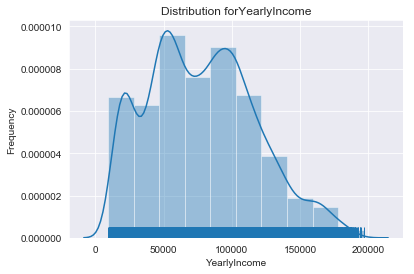

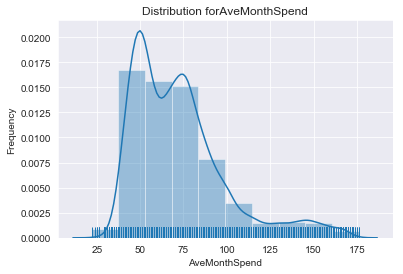

In [41]:
column=['YearlyIncome','AveMonthSpend', 'Age']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(train, column, hist= True)

In [42]:
train['Age']=np.log(train['Age'])
train['YearlyIncome']=(train['YearlyIncome'])**0.5

In [43]:
test['Age']=np.log(test['Age'])
test['YearlyIncome']=(test['YearlyIncome'])**0.5

In [44]:
train.head()

CustomerID CountryRegionName   Education    Occupation Gender  \
0       11000         Australia  Bachelors   Professional      M   
1       11001         Australia  Bachelors   Professional      M   
2       11002         Australia  Bachelors   Professional      M   
3       11003         Australia  Bachelors   Professional      F   
4       11004         Australia  Bachelors   Professional      F   

  MaritalStatus  HomeOwnerFlag NumberCarsOwned NumberChildrenAtHome  \
0             M              1         No cars          No Children   
1             S              0         >1 cars          More than 1   
2             M              1         >1 cars          More than 1   
3             S              0         >1 cars          No Children   
4             S              1         >3 cars          More than 1   

  TotalChildren  YearlyIncome  AveMonthSpend       Age  
0   More than 1    371.412170             89  3.465736  
1   More than 1    318.026728            117  3.496508  
2   More than 1    303.224339            123  3.496508  
3   No Children    294.428260             50  3.401197  
4   More than 1    304.583322             95  3.401197

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


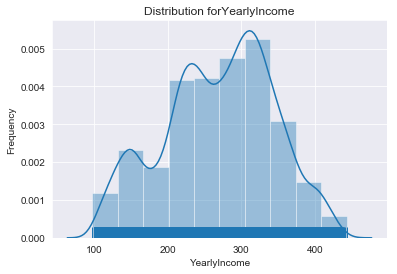

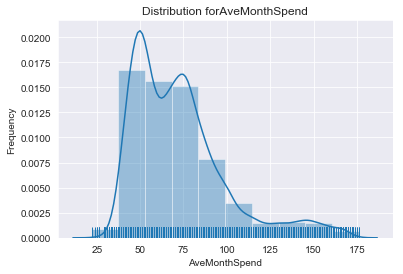

In [45]:
column=['YearlyIncome','AveMonthSpend', 'Age']

distplot(train, column, hist=True)

In [46]:
train['CountryRegionName'].value_counts()

United States     7088
Australia         3263
United Kingdom    1727
France            1624
Germany           1610
Canada            1437
Name: CountryRegionName, dtype: int64

In [47]:
test['CountryRegionName'].value_counts()

United States     225
Australia          86
Canada             49
Germany            49
France             47
United Kingdom     44
Name: CountryRegionName, dtype: int64

In [48]:
col=['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus','NumberCarsOwned', 
        'NumberChildrenAtHome','TotalChildren']
train=pd.get_dummies(train, prefix=col, columns=col)
test=pd.get_dummies(test, prefix=col, columns=col)

In [49]:
train.columns

Index(['CustomerID', 'HomeOwnerFlag', 'YearlyIncome', 'AveMonthSpend', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_More than 1',
       'NumberChildrenAtHome_No Children', 'TotalChildren_More than 1',
       'TotalChildren_No Children'],
      dtype='object')

In [50]:
print('Shape of train', train.shape)
print('Shape of test', test.shape)

Shape of train (16749, 32)
Shape of test (500, 31)


Text(0.5,1,'Correlation Matrix')

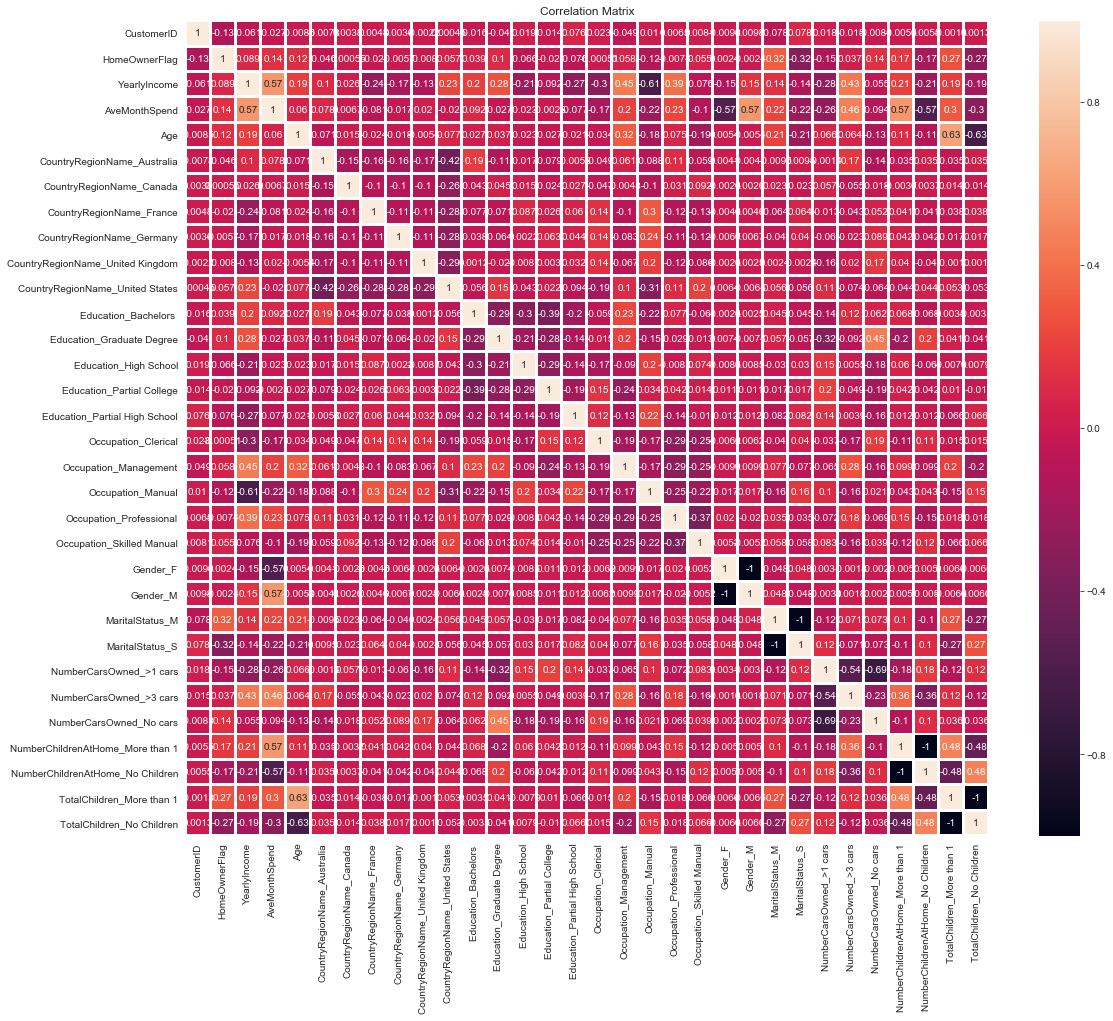

In [51]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(train.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [52]:
##Splitting and Applying Algorithm

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from math import sqrt

In [54]:
feature_col=['HomeOwnerFlag', 'YearlyIncome', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_More than 1',
       'NumberChildrenAtHome_No Children', 'TotalChildren_More than 1',
       'TotalChildren_No Children']
predicted_class_names=['AveMonthSpend']
X=train[feature_col].values
y=train[predicted_class_names].values 
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [55]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


In [56]:
column=['HomeOwnerFlag', 'YearlyIncome', 'Age',
       'CountryRegionName_Australia', 'CountryRegionName_Canada',
       'CountryRegionName_France', 'CountryRegionName_Germany',
       'CountryRegionName_United Kingdom', 'CountryRegionName_United States',
       'Education_Bachelors ', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Clerical',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Gender_F', 'Gender_M', 'MaritalStatus_M',
       'MaritalStatus_S', 'NumberCarsOwned_>1 cars', 'NumberCarsOwned_>3 cars',
       'NumberCarsOwned_No cars', 'NumberChildrenAtHome_More than 1',
       'NumberChildrenAtHome_No Children', 'TotalChildren_More than 1',
       'TotalChildren_No Children']
test1=test[column]

In [57]:
print(X_train.shape)
print(test1.shape)

(11724, 30)
(500, 30)


In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [59]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
regpred=reg.predict(X_train)
regpred_test=reg.predict(X_test)
print("Accuracy on training set:{:.7f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.7f}".format(reg.score(X_test, y_test)))

MSE= mean_squared_error(y_train, regpred)
MSE_test= mean_squared_error(y_test, regpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set:0.8445714
Accuracy on test set: 0.8433936
MSE: 116.16947382509966
MSE Test: 116.34024529355963
RMSE: 10.778194367569164
RMSE Test: 10.786113539804763


In [61]:
solution=reg.predict(test1)
np.savetxt('LinearRegressionMicrosoft.csv', solution, delimiter=',')

In [62]:
gbr=GradientBoostingRegressor (max_depth=5)
gbr.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [63]:
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.title('Feature Importance')
plt.show()

In [64]:
print("Accuracy on training set: {:.7f}".format(gbr.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(gbr.score(X_test, y_test)))
gbrpred=gbr.predict(X_train)
gbrpred_test=gbr.predict(X_test)

MSE= mean_squared_error(y_train, gbrpred)
MSE_test= mean_squared_error(y_test, gbrpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.9666109
Accuracy on test set: 0.9596686
MSE: 24.955445684673297
MSE Test: 29.961510344163692
RMSE: 4.995542581609459
RMSE Test: 5.473710838559495


In [65]:
solution=gbr.predict(test1)
my_submission=pd.DataFrame({'CustomerID':test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('GradientBoostingMicrosoft.csv', index=False)

In [66]:
import xgboost as xgb
xgb=xgb.XGBRegressor(max_depth=5, n_estimators=100)
xgb.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [67]:
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

NameError: name 'xgb' is not defined

In [68]:
print("Accuracy on training set: {:.7f}".format(xgb.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(xgb.score(X_test, y_test)))
xgbpred=xgb.predict(X_train)
xgbpred_test=xgb.predict(X_test)

MSE= mean_squared_error(y_train, xgbpred)
MSE_test= mean_squared_error(y_test, xgbpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

NameError: name 'xgb' is not defined

In [69]:
solution=xgb.predict(test1)
my_submission=pd.DataFrame({'CustomerID':test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('XgboostMicrosoft.csv', index=False)

NameError: name 'xgb' is not defined

In [70]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(activation='tanh',hidden_layer_sizes=(100,100))
mlp.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [71]:
print("Accuracy on training set: {:.7f}".format(mlp.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(mlp.score(X_test, y_test)))
mlppred=mlp.predict(X_train)
mlppred_test=mlp.predict(X_test)

MSE= mean_squared_error(y_train, mlppred)
MSE_test= mean_squared_error(y_test, mlppred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.9752784
Accuracy on test set: 0.9679790
MSE: 18.477245508588258
MSE Test: 23.787856180007115
RMSE: 4.298516663756028
RMSE Test: 4.877279588049788


In [72]:
solution=mlp.predict(test1)
my_submission=pd.DataFrame({'CustomerID':test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('NeuralNetworkMicrosoft.csv', index=False)

In [73]:
rf=RandomForestRegressor(min_samples_leaf=5, max_features=1.0, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1.0, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()

In [75]:
print("Accuracy on training set: {:.7f}".format(rf.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(rf.score(X_test, y_test)))
rfpred=rf.predict(X_train)
rfpred_test=rf.predict(X_test)

MSE= mean_squared_error(y_train, rfpred)
MSE_test= mean_squared_error(y_test, rfpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.9774993
Accuracy on test set: 0.9613890
MSE: 16.817314264784663
MSE Test: 28.683474901219753
RMSE: 4.10089188650282
RMSE Test: 5.355695557182069


In [76]:
solution=rf.predict(test1)
my_submission=pd.DataFrame({'CustomerID':test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('RandomForestMicrosoft.csv', index=False)